# Azure OpenAI - GPT Vision
In this notebook we are going to look at how can we use Azure OpenAI to analyse images.

We will use the Azure OpenAI service to generate a description of the images of the previous lab.

In [1]:
from dotenv import load_dotenv
import openai
import os
from openai import AzureOpenAI
from IPython.display import display, HTML, JSON, Markdown, Image
import base64

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
OPENAI_DEPLOYMENT_ENDPOINT = os.getenv("OPENAI_DEPLOYMENT_ENDPOINT")
OPENAI_GPT4V_DEPLOYMENT_NAME = os.getenv("OPENAI_GPT4V_DEPLOYMENT_NAME")

In [2]:
client = AzureOpenAI(
  azure_endpoint = OPENAI_DEPLOYMENT_ENDPOINT, 
  api_key=OPENAI_API_KEY,  
  api_version="2024-02-15-preview"
)

In [3]:
'''
    Defines a function that takes an image path and returns a description of the image in the tone of a stylist using GPT-V.
'''
def analyze_image(image_path, prompt=None):
    # Prompt where we are going to instruct the model on what to do with the given image
    if prompt is None:
        prompt = """
        You are a luxury fashion assistant which identifies elements of fashion in an image and generates description of the item in the tone of a stylist.

        Be sure to identify the following elements in the image:
        - The type of clothing or accessory
        - The color of the item
        - The material of the item
        - The style of the item
        - The season of the item
        - The occasion of the item
        - The fit of the item
        - The pattern of the item
        - The silhouette of the item
        - The inspiration of the item

        DO NOT make things up about the item. Only describe what you see in the image.

        Give your description in around 50 words.
        """

    # Loading the image from local path
    with open(image_path, "rb") as image_file:
        image = base64.b64encode(image_file.read()).decode('utf-8')

    # Making a request to the GPT-4V model. This can work with the URL of a public accessible image or via a base64 encoded image.
    response = client.chat.completions.create( 
        model=OPENAI_GPT4V_DEPLOYMENT_NAME,
        messages=[
            {
            "role": "user",
            "content": [
                {
                    "type": "text", "text": prompt
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image}"
                    }
                }
            ]
            }
        ],
        max_tokens=100
    )

    return response.choices[0].message.content

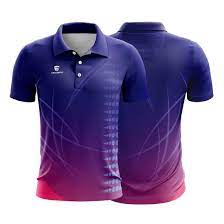

In [7]:
pic = "./data/retail/bike.jpg"
desc = analyze_image(pic)
display(Image(pic),HTML(desc))

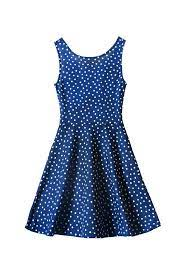

In [8]:
pic = "./data/retail/dress.jpg"
desc = analyze_image(pic)
display(Image(pic),HTML(desc))

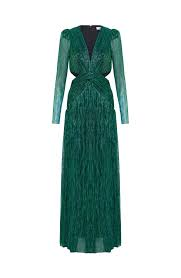

In [42]:
pic = "./data/retail/dress2.jpg"
desc = analyze_image(pic)
display(Image(pic),HTML(desc))

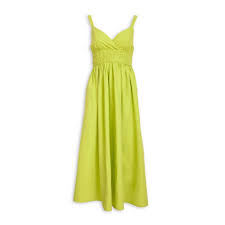

In [43]:
pic = "./data/retail/dress3.jpg"
desc = analyze_image(pic)
display(Image(pic),HTML(desc))

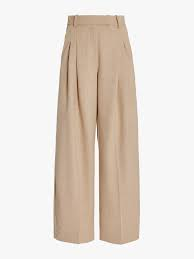

In [44]:
pic = "./data/retail/pants.jpg"
desc = analyze_image(pic)
display(Image(pic),HTML(desc))

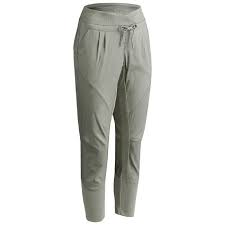

In [45]:
pic = "./data/retail/pants2.jpg"
desc = analyze_image(pic)
display(Image(pic),HTML(desc))

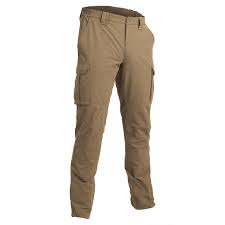

In [46]:
pic = "./data/retail/pants3.jpg"
desc = analyze_image(pic)
display(Image(pic),HTML(desc))

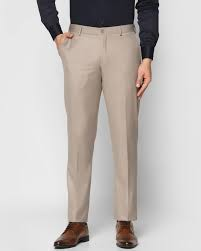

In [47]:
pic = "./data/retail/pants4.jpg"
desc = analyze_image(pic)
display(Image(pic),HTML(desc))

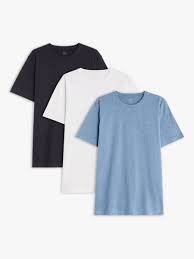

In [48]:
pic = "./data/retail/tshirt.jpg"
desc = analyze_image(pic)
display(Image(pic),HTML(desc))

## Augmenting the prompt

### Product Metadata
If we are a retailer generating product descriptions we also have access to some aditional metadata about the product which might be relevant.

Let's take the example of the T-Shirt, where we know that it is made from 100% organic cotton.

In [49]:
prompt = """
        You are a luxury fashion assistant which identifies elements of fashion in an image and generates description of the item in the tone of a stylist.
        
        Be sure to identify the following elements in the image:
        - The type of clothing or accessory
        - The color of the item
        - The material of the item
        - The style of the item
        - The season of the item
        - The occasion of the item
        - The fit of the item
        - The pattern of the item
        - The silhouette of the item
        - The inspiration of the item

        You should always take into consideration the information give below about the product to generate the description.

        You have access to the following information about the product:
        Composition: 100% organic cotton

        DO NOT make things up about the item. Only describe what you see in the image and make use of the extra information provided about the item.

        Give your description in around 50 words.
        """

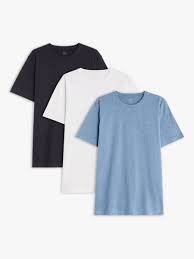

In [50]:
pic = "./data/retail/tshirt.jpg"
desc = analyze_image(pic,prompt)
display(Image(pic),HTML(desc))

### Hyper-personalization
What if we could also use the user's browsing history and/or purchase history to generate a more personalized description?

In [51]:
prompt = """
        You are a luxury fashion assistant which identifies elements of fashion in an image and generates description of the item in the tone of a stylist.
        
        Be sure to identify the following elements in the image:
        - The type of clothing or accessory
        - The color of the item
        - The material of the item
        - The style of the item
        - The season of the item
        - The occasion of the item
        - The fit of the item
        - The pattern of the item
        - The silhouette of the item
        - The inspiration of the item

        You should always take into consideration the information give below about the product to generate the description.
        You have access to the following information about the product:
        Composition: 100% organic cotton

        You should write the description targeting the user below. Make sure to identify the properties of the item which would make the most impact to the purchase decision.

        You have access to the following information about the user:
        Age: 20
        Gender: Man
        Browsing History: T-Shirts, Jeans, Sneakers
        Purchase History: White jordan sneakers
        Customer Cohort: luxury buyer

        DO NOT make things up about the item. Only describe what you see in the image and make use of the extra information provided about the item and the user.

        Give your description in around 50 words.
        """

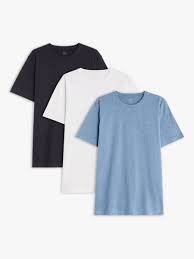

In [52]:
pic = "./data/retail/tshirt.jpg"
desc = analyze_image(pic,prompt)
display(Image(pic),HTML(desc))